In [1]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import numpy as np

# Simple Knowledge of SMA strategies

In [2]:
# import zipfile
# with zipfile.ZipFile("Part3_Materials.zip","r") as zip_ref:
#     zip_ref.extractall("")

In [3]:
df = pd.read_csv("Part3_Materials/eurusd.csv", parse_dates=["Date"], index_col = ["Date"])

In [4]:
df.head()

,price
Date,
2004-01-01,1.258194
2004-01-02,1.258194
2004-01-05,1.268698
2004-01-06,1.272103
2004-01-07,1.264095


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4275 entries, 2004-01-01 to 2020-06-30
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   price   4275 non-null   float64
dtypes: float64(1)
memory usage: 66.8 KB


Text(0.5, 1.0, 'EUR/USD')

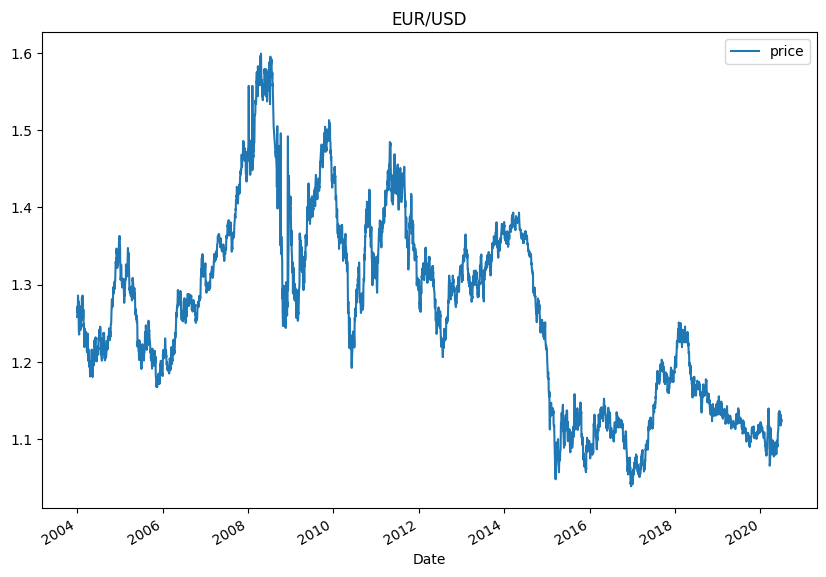

In [6]:
df.plot(figsize=(10,7))
plt.title("EUR/USD")

In [7]:
df.head()

,price
Date,
2004-01-01,1.258194
2004-01-02,1.258194
2004-01-05,1.268698
2004-01-06,1.272103
2004-01-07,1.264095


## Finding log returns

In [8]:
# Finding log returns
df["log_returns"] = df["price"].div(df["price"].shift(1))
df["log_returns"] = np.log(df["log_returns"])
df.head()

,price,log_returns
Date,,
2004-01-01,1.258194,NaN
2004-01-02,1.258194,0.000000
2004-01-05,1.268698,0.008313
2004-01-06,1.272103,0.002681
2004-01-07,1.264095,-0.006315


In [9]:
df.tail()

,price,log_returns
Date,,
2020-06-24,1.131235,0.002892
2020-06-25,1.125087,-0.005449
2020-06-26,1.122208,-0.002562
2020-06-29,1.122586,0.000337
2020-06-30,1.124720,0.001899


We could see that, we've invested for 16 years.

In [10]:
df.dropna(inplace=True)

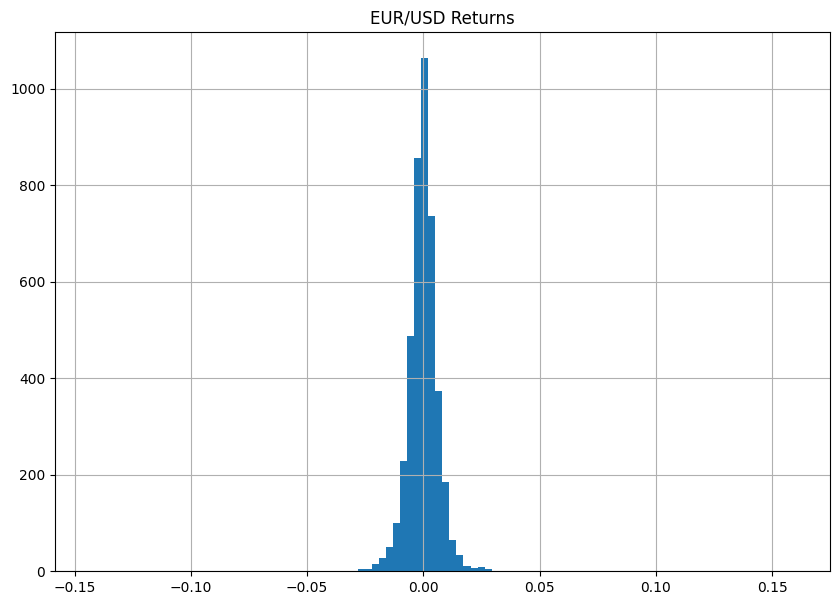

In [11]:
df["log_returns"].hist(bins=100, figsize=(10,7))
plt.title("EUR/USD Returns")
plt.show()

In [12]:
cumulative_re = df["log_returns"].sum()
cumulative_re

-0.11214302770699758

In [13]:
percent_return = np.exp(cumulative_re)
print(f"Percent that return if we invest in this stock for 16 years: {percent_return}")

Percent that return if we invest in this stock for 16 years: 0.8939163935445148


In [14]:
df.head()

,price,log_returns
Date,,
2004-01-02,1.258194,0.000000
2004-01-05,1.268698,0.008313
2004-01-06,1.272103,0.002681
2004-01-07,1.264095,-0.006315
2004-01-08,1.277498,0.010547


## Finding Cumulative Returns

In [15]:
# Cumulative sum of `log_returns`
df["cumulative_log_returns"] = df["log_returns"].cumsum()
df.head()

,price,log_returns,cumulative_log_returns
Date,,,
2004-01-02,1.258194,0.000000,0.000000
2004-01-05,1.268698,0.008313,0.008313
2004-01-06,1.272103,0.002681,0.010994
2004-01-07,1.264095,-0.006315,0.004679
2004-01-08,1.277498,0.010547,0.015226


In [16]:
df["cumulative_returns"] = np.exp(df["cumulative_log_returns"])
df.head()

,price,log_returns,cumulative_log_returns,cumulative_returns
Date,,,,
2004-01-02,1.258194,0.000000,0.000000,1.000000
2004-01-05,1.268698,0.008313,0.008313,1.008348
2004-01-06,1.272103,0.002681,0.010994,1.011055
2004-01-07,1.264095,-0.006315,0.004679,1.004690
2004-01-08,1.277498,0.010547,0.015226,1.015343


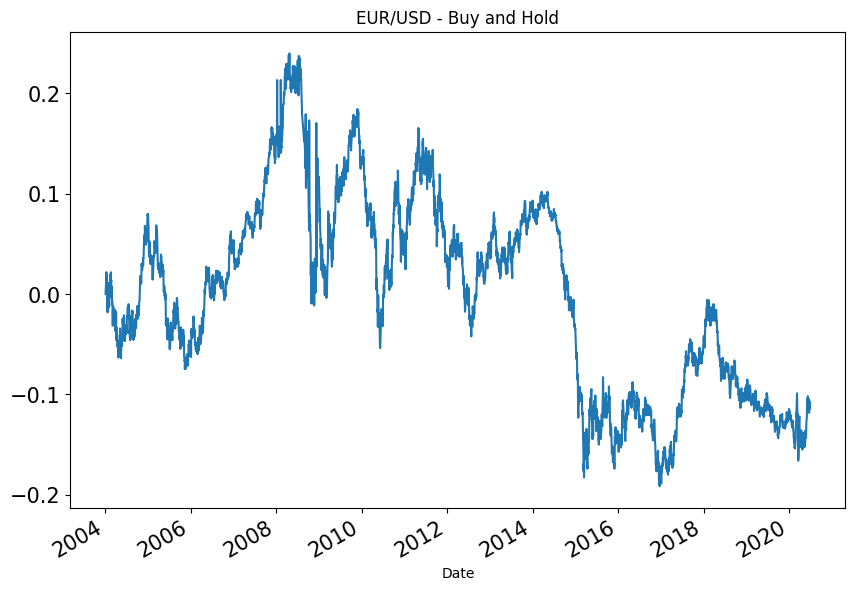

In [17]:
df["cumulative_log_returns"].plot(figsize=(10,7), title="EUR/USD - Buy and Hold", fontsize=15)
plt.show()

In [18]:
df.tail()

,price,log_returns,cumulative_log_returns,cumulative_returns
Date,,,,
2020-06-24,1.131235,0.002892,-0.106368,0.899094
2020-06-25,1.125087,-0.005449,-0.111817,0.894208
2020-06-26,1.122208,-0.002562,-0.114379,0.891920
2020-06-29,1.122586,0.000337,-0.114042,0.892221
2020-06-30,1.124720,0.001899,-0.112143,0.893916


In [19]:
# Finding absoulute performance
absolute_per = df["cumulative_returns"][-1]
print(f"Return if we invest 1$: {absolute_per}")

Return if we invest 1$: 0.8939163935445149


## Annualized mean return and risk

In [20]:
# Finding mean returns
mean_log_returns = df["log_returns"].mean() * 252
print(f"Annualized returns: {mean_log_returns}\nAnnualized returns percent: {round(mean_log_returns*100,3)}%")

Annualized returns: -0.006612083056191715
Annualized returns percent: -0.661%


In [21]:
std_log_returns = df["log_returns"].std() * np.sqrt(252)
print(f"Risk return percent: {std_log_returns}%")

Risk return percent: 0.12054120479431406%


## Maximum drawdown
For the siauation that returns are not normally distributed and as a consequence, extreme outcomes and the risk are not fully reflected

In [22]:
df.head()

,price,log_returns,cumulative_log_returns,cumulative_returns
Date,,,,
2004-01-02,1.258194,0.000000,0.000000,1.000000
2004-01-05,1.268698,0.008313,0.008313,1.008348
2004-01-06,1.272103,0.002681,0.010994,1.011055
2004-01-07,1.264095,-0.006315,0.004679,1.004690
2004-01-08,1.277498,0.010547,0.015226,1.015343


In [23]:
df["cumulative_maximum"] = df["cumulative_returns"].cummax()
df.head()

,price,log_returns,cumulative_log_returns,cumulative_returns,cumulative_maximum
Date,,,,,
2004-01-02,1.258194,0.000000,0.000000,1.000000,1.000000
2004-01-05,1.268698,0.008313,0.008313,1.008348,1.008348
2004-01-06,1.272103,0.002681,0.010994,1.011055,1.011055
2004-01-07,1.264095,-0.006315,0.004679,1.004690,1.011055
2004-01-08,1.277498,0.010547,0.015226,1.015343,1.015343


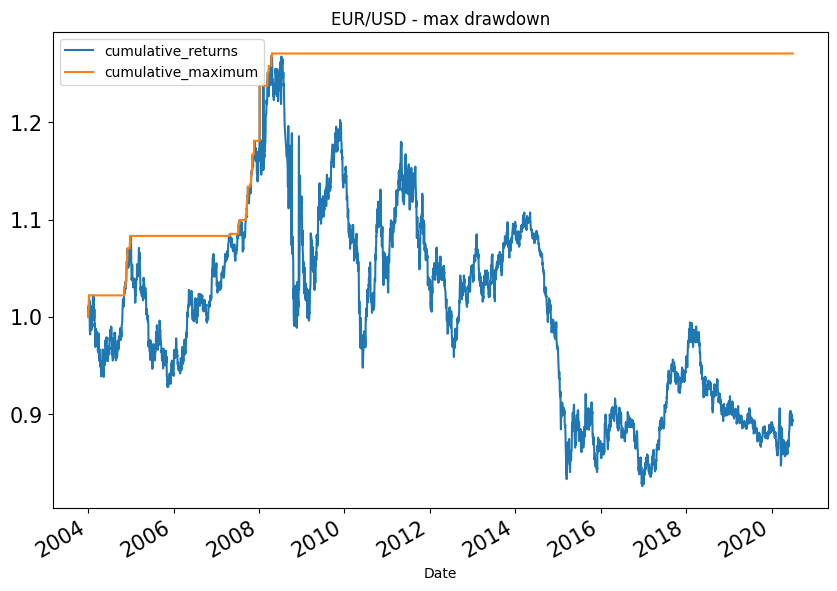

In [24]:
df[["cumulative_returns", "cumulative_maximum"]].plot(figsize=(10,7), title = "EUR/USD - max drawdown", fontsize=15)
plt.show()

In [25]:
df["draw_down"] = df["cumulative_maximum"]-df["cumulative_returns"]
df.head()

,price,log_returns,cumulative_log_returns,cumulative_returns,cumulative_maximum,draw_down
Date,,,,,,
2004-01-02,1.258194,0.000000,0.000000,1.000000,1.000000,0.000000
2004-01-05,1.268698,0.008313,0.008313,1.008348,1.008348,0.000000
2004-01-06,1.272103,0.002681,0.010994,1.011055,1.011055,0.000000
2004-01-07,1.264095,-0.006315,0.004679,1.004690,1.011055,0.006365
2004-01-08,1.277498,0.010547,0.015226,1.015343,1.015343,0.000000


In [26]:
df["draw_down"].max(), df["draw_down"].head()

(0.4448840569933439,
 Date
 2004-01-02    0.000000
 2004-01-05    0.000000
 2004-01-06    0.000000
 2004-01-07    0.006365
 2004-01-08    0.000000
 Name: draw_down, dtype: float64)

# Definining SMA strategy

In [27]:
df

,price,log_returns,cumulative_log_returns,cumulative_returns,cumulative_maximum,draw_down
Date,,,,,,
2004-01-02,1.258194,0.000000,0.000000,1.000000,1.000000,0.000000
2004-01-05,1.268698,0.008313,0.008313,1.008348,1.008348,0.000000
2004-01-06,1.272103,0.002681,0.010994,1.011055,1.011055,0.000000
2004-01-07,1.264095,-0.006315,0.004679,1.004690,1.011055,0.006365
2004-01-08,1.277498,0.010547,0.015226,1.015343,1.015343,0.000000
...,...,...,...,...,...,...
2020-06-24,1.131235,0.002892,-0.106368,0.899094,1.270709,0.371615
2020-06-25,1.125087,-0.005449,-0.111817,0.894208,1.270709,0.376500
2020-06-26,1.122208,-0.002562,-0.114379,0.891920,1.270709,0.378788


In [31]:
sma_s, sma_l = 50, 200
df["sma_s"] = df["price"].rolling(sma_s).mean()
df["sma_l"] = df["price"].rolling(sma_l).mean()
df.tail()

,price,log_returns,cumulative_log_returns,cumulative_returns,cumulative_maximum,draw_down,sma_s,sma_l
Date,,,,,,,,
2020-06-24,1.131235,0.002892,-0.106368,0.899094,1.270709,0.371615,1.101794,1.103430
2020-06-25,1.125087,-0.005449,-0.111817,0.894208,1.270709,0.376500,1.102486,1.103540
2020-06-26,1.122208,-0.002562,-0.114379,0.891920,1.270709,0.378788,1.103213,1.103627
2020-06-29,1.122586,0.000337,-0.114042,0.892221,1.270709,0.378488,1.103931,1.103730
2020-06-30,1.124720,0.001899,-0.112143,0.893916,1.270709,0.376792,1.104695,1.103857


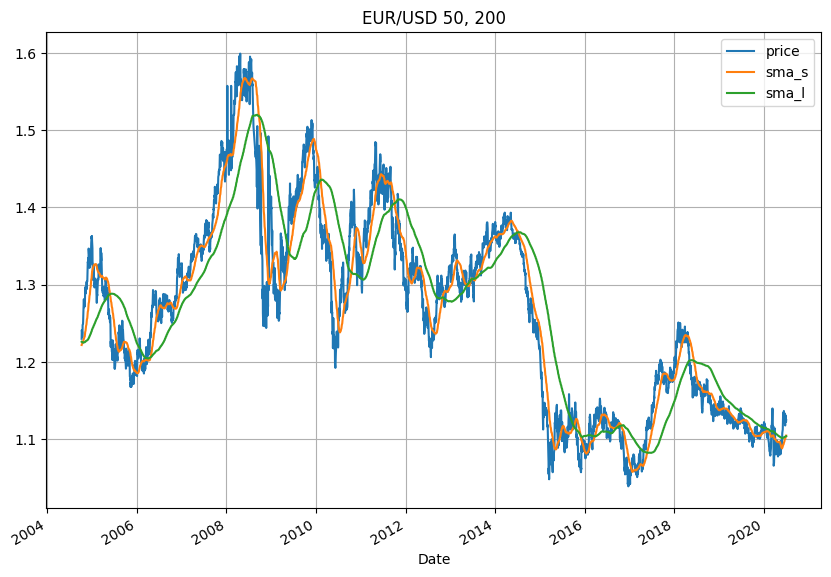

In [38]:
df[["price","sma_s","sma_l"]].dropna().plot(figsize=(10,7))
plt.title(f"EUR/USD {sma_s}, {sma_l}")
plt.grid()

In [39]:
df.dropna(inplace=True)

In [40]:
df.head()

,price,log_returns,cumulative_log_returns,cumulative_returns,cumulative_maximum,draw_down,sma_s,sma_l
Date,,,,,,,,
2004-10-07,1.229906,0.001475,-0.022739,0.977517,1.022015,0.044497,1.221840,1.226081
2004-10-08,1.241003,0.008982,-0.013758,0.986337,1.022015,0.035678,1.222628,1.225995
2004-10-11,1.238405,-0.002095,-0.015853,0.984272,1.022015,0.037742,1.223352,1.225843
2004-10-12,1.232104,-0.005102,-0.020954,0.979264,1.022015,0.042751,1.223888,1.225643
2004-10-13,1.234903,0.002270,-0.018685,0.981489,1.022015,0.040526,1.224466,1.225497


Text(0.5, 1.0, 'EUR/USD - 50, 200')

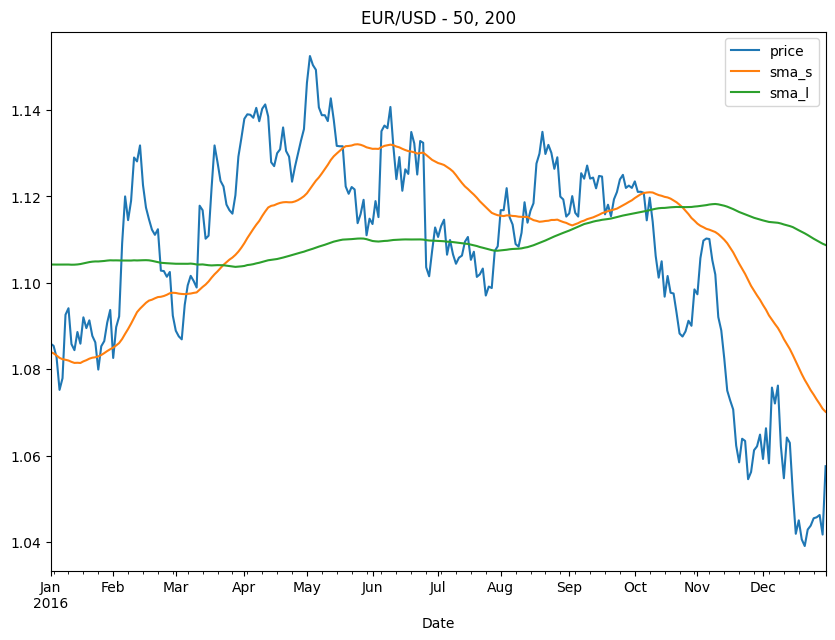

In [44]:
df[["price","sma_s","sma_l"]].loc["2016"].plot(figsize=(10,7))
plt.title(f"EUR/USD - {sma_s}, {sma_l}")

In [48]:
df["position"] = np.where(df["sma_s"] > df["sma_l"], 1, -1)
df.head()

,price,log_returns,cumulative_log_returns,cumulative_returns,cumulative_maximum,draw_down,sma_s,sma_l,position
Date,,,,,,,,,
2004-10-07,1.229906,0.001475,-0.022739,0.977517,1.022015,0.044497,1.221840,1.226081,-1
2004-10-08,1.241003,0.008982,-0.013758,0.986337,1.022015,0.035678,1.222628,1.225995,-1
2004-10-11,1.238405,-0.002095,-0.015853,0.984272,1.022015,0.037742,1.223352,1.225843,-1
2004-10-12,1.232104,-0.005102,-0.020954,0.979264,1.022015,0.042751,1.223888,1.225643,-1
2004-10-13,1.234903,0.002270,-0.018685,0.981489,1.022015,0.040526,1.224466,1.225497,-1


<AxesSubplot: xlabel='Date'>

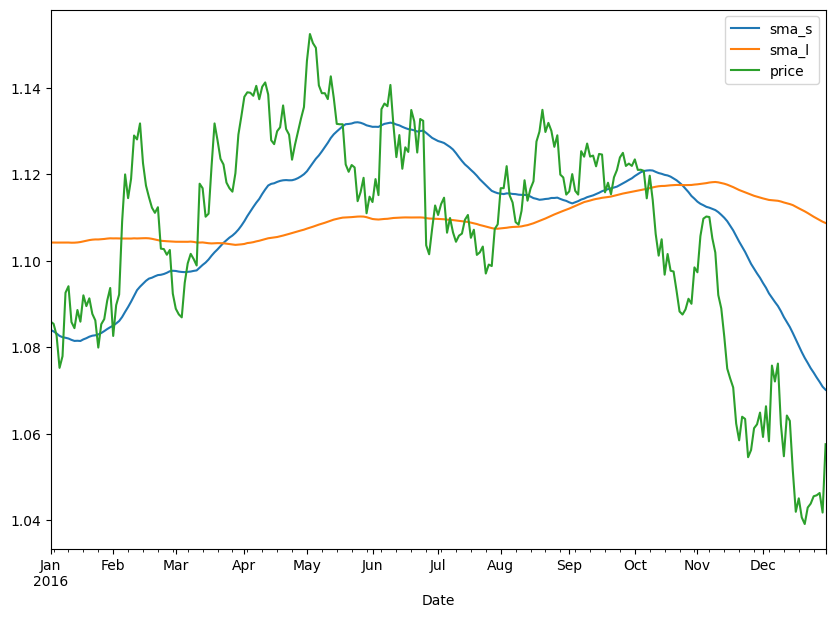

In [54]:
df[["sma_s","sma_l","price"]].loc["2016,2017"].plot(figsize=(10,7),secondary_y = "position")

<AxesSubplot: xlabel='Date'>

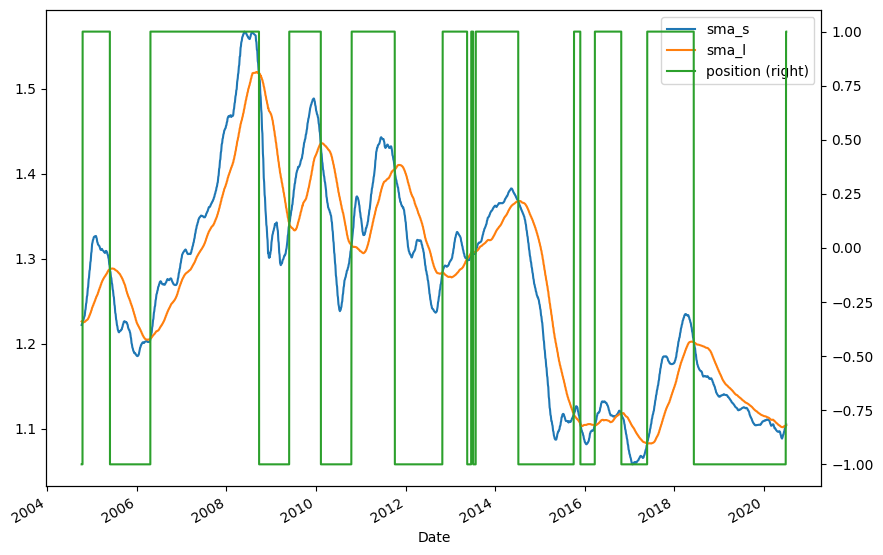

In [50]:
df[["sma_s","sma_l","position"]].plot(figsize=(10,7),secondary_y = "position")

<AxesSubplot: xlabel='Date'>

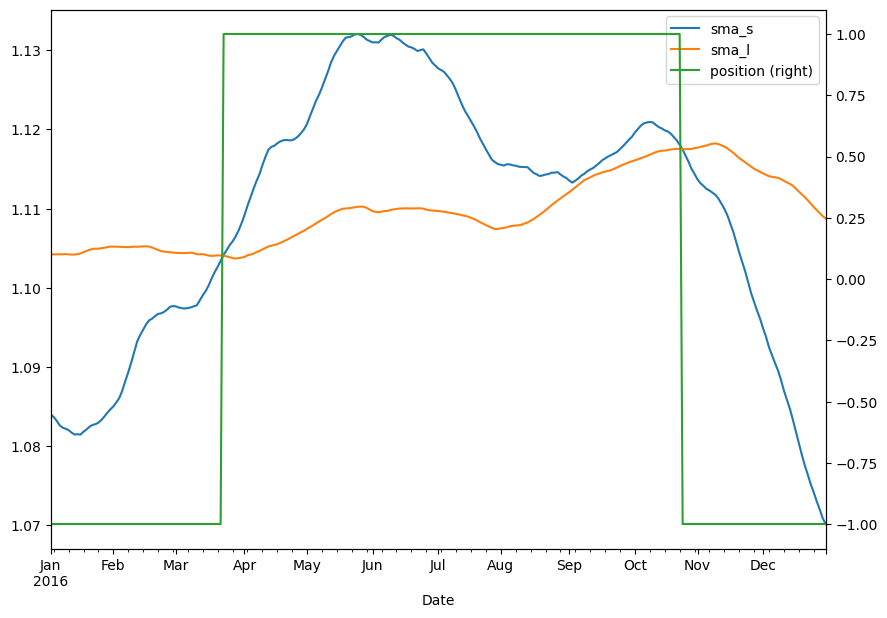

In [51]:
df[["sma_s","sma_l","position"]].loc["2016"].plot(figsize=(10,7),secondary_y = "position")